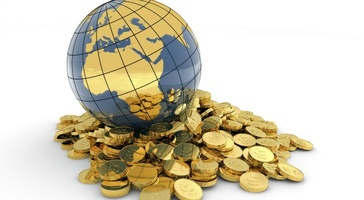

# Africa Economic, Banking and Systemic Crisis Data 
# Regression Project


In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

## 1. EDA
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

In [2]:
df = pd.read_csv('african_crises.csv', index_col='cc3')
df.head(3)

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
cc3,,,,,,,,,,,,,
DZA,1,Algeria,1870,1,0.052,0,0,0.000,3.441,0,0,0,crisis
DZA,1,Algeria,1871,0,0.053,0,0,0.000,14.149,0,0,0,no_crisis
DZA,1,Algeria,1872,0,0.052,0,0,0.000,-3.719,0,0,0,no_crisis


In [3]:
df["banking_crisis_new"]=df.banking_crisis.replace({'crisis':1,'no_crisis':0})
df=df.drop(columns='banking_crisis',axis=0)
df.head(1)

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
cc3,,,,,,,,,,,,,
DZA,1,Algeria,1870,1,0.052,0,0,0.000,3.441,0,0,0,1


In [4]:
print("Checking the columns in the dataset.")
df.columns

Checking the columns in the dataset.


Index(['case', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis_new'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, DZA to ZWE
Data columns (total 13 columns):
case                               1059 non-null int64
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis_new                 1059 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 115.8+ KB


In [6]:
df.isnull().sum()

case                               0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis_new                 0
dtype: int64

The Dataset has no null value.

In [7]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
count,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000
mean,35.614,1967.768,0.077,43.141,0.040,0.153,0.006,20848.892,0.776,0.132,0.129,0.089
std,23.692,33.531,0.267,111.475,0.195,0.360,0.044,675727.429,0.417,0.350,0.336,0.285
min,1.000,1860.000,0.000,0.000,0.000,0.000,0.000,-28.502,0.000,0.000,0.000,0.000
25%,15.000,1951.000,0.000,0.195,0.000,0.000,0.000,2.086,1.000,0.000,0.000,0.000
50%,38.000,1973.000,0.000,0.868,0.000,0.000,0.000,5.762,1.000,0.000,0.000,0.000
75%,56.000,1994.000,0.000,8.463,0.000,0.000,0.000,11.644,1.000,0.000,0.000,0.000
max,70.000,2014.000,1.000,744.306,1.000,1.000,0.400,21989695.220,1.000,2.000,1.000,1.000


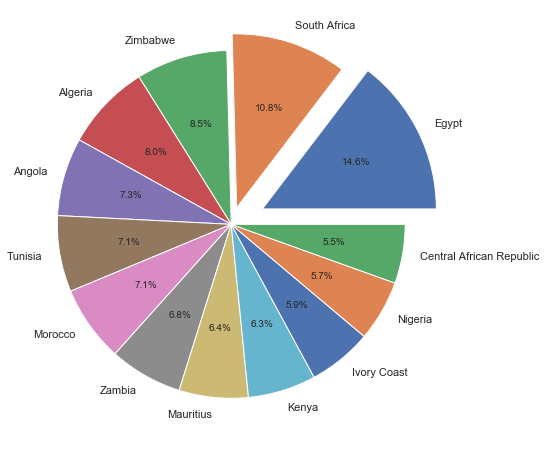

In [8]:
# Dataset is non-uniform and recently formed countries have least data
plt.figure(figsize=(8,8))
counts= df['country'].value_counts()
country=counts.index
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0)
plt.pie(counts, explode=explode,labels=country,autopct='%1.1f%%')
plt.show()

# 2. Which factors are most associated with exchange usd in Africa (Egypt) ?

In [9]:
EGY=df.loc['EGY',['country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis_new']] #Belirtilen indeksin sadece A ve B sütunlarının görüntülenmesi
EGY.head(1)

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
cc3,,,,,,,,,,,,
EGY,Egypt,1860,0,0.207,0,0,0.000,5.944,1,0,0,0


In [10]:
add = pd.read_csv('yeni.csv',index_col=0)
add.head(5)

,GDP,Per Capita,Growth,year
0,4.949,162.608,4.914,1965
1,5.278,168.963,5.046,1966
2,5.605,174.863,0.805,1967
3,5.932,180.411,-1.607,1968
4,6.524,193.586,5.279,1969


In [11]:
add = add.drop(columns='year',axis=0)
add = add.rename(columns={" Growth": "growth", " Per Capita": "per_capita", "GDP":"gdp"})

In [12]:
EGY=EGY.loc [ EGY ['year'] >=1965]
EGY=EGY.reset_index()
EGY.head(2)

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
0,EGY,Egypt,1965,0,0.435,0,0,0.000,13.121,1,0,0,0
1,EGY,Egypt,1966,0,0.435,0,0,0.000,6.694,1,0,0,0


In [121]:
egy_new = pd.concat([EGY,add], axis=1)
egy_new.head(2)

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new,gdp,per_capita,growth
0,EGY,Egypt,1965,0,0.435,0,0,0.000,13.121,1,0,0,0,4.949,162.608,4.914
1,EGY,Egypt,1966,0,0.435,0,0,0.000,6.694,1,0,0,0,5.278,168.963,5.046


In [14]:
egy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
cc3                                50 non-null object
country                            50 non-null object
year                               50 non-null int64
systemic_crisis                    50 non-null int64
exch_usd                           50 non-null float64
domestic_debt_in_default           50 non-null int64
sovereign_external_debt_default    50 non-null int64
gdp_weighted_default               50 non-null float64
inflation_annual_cpi               50 non-null float64
independence                       50 non-null int64
currency_crises                    50 non-null int64
inflation_crises                   50 non-null int64
banking_crisis_new                 50 non-null int64
gdp                                50 non-null float64
per_capita                         50 non-null float64
growth                             50 non-null float64
dtypes: float64(6), int64(8), objec

In [15]:
egy_new.describe()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new,gdp,per_capita,growth
count,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,1989.500,0.080,2.629,0.000,0.020,0.008,10.061,1.000,0.120,0.120,0.180,70.701,1009.828,5.048
std,14.577,0.274,2.321,0.000,0.141,0.057,6.250,0.000,0.328,0.328,0.388,78.284,852.935,2.690
min,1965.000,0.000,0.391,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,4.949,162.608,-1.607
25%,1977.250,0.000,0.435,0.000,0.000,0.000,5.216,1.000,0.000,0.000,0.000,14.504,357.520,3.514
50%,1989.500,0.000,1.550,0.000,0.000,0.000,10.001,1.000,0.000,0.000,0.000,40.855,771.750,4.917
75%,2001.750,0.000,4.498,0.000,0.000,0.000,12.868,1.000,0.000,0.000,0.000,89.227,1268.282,5.988
max,2014.000,1.000,7.150,0.000,1.000,0.400,25.185,1.000,1.000,1.000,1.000,305.530,3378.831,13.280


In [16]:
egy_new=egy_new.drop(columns=['independence','domestic_debt_in_default', 'gdp_weighted_default', 'sovereign_external_debt_default'],axis=0)

In [17]:
egy_new.corr().exch_usd.abs().sort_values()

currency_crises        0.054
banking_crisis_new     0.062
inflation_annual_cpi   0.180
inflation_crises       0.194
systemic_crisis        0.248
growth                 0.275
gdp                    0.855
per_capita             0.860
year                   0.938
exch_usd               1.000
Name: exch_usd, dtype: float64

(0, 10)

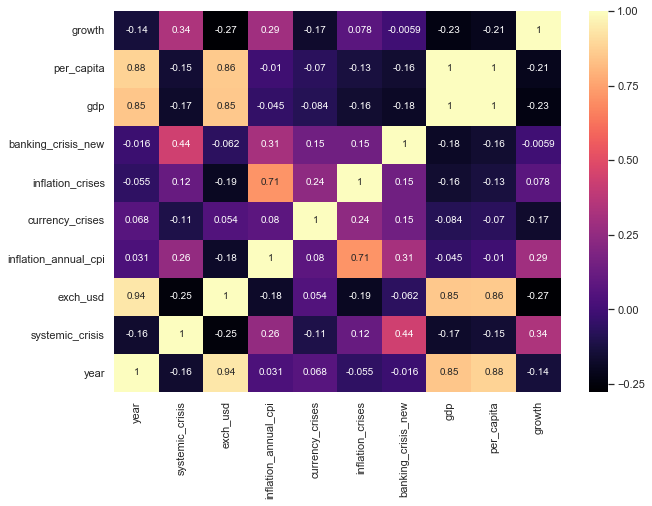

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(egy_new.corr(), cmap='magma', annot=True)
plt.ylim(0,10)

In [122]:
#Model 1
Y = egy_new['exch_usd']


X = egy_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 'currency_crises', 'inflation_crises',
       'banking_crisis_new', 'gdp', 'per_capita', 'growth']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [124]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           8.37e-18
Time:                        20:55:10   Log-Likelihood:                -10.840
No. Observations:                  35   AIC:                             41.68
Df Residuals:                      25   BIC:                             57.23
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -356.3960     26.115    -13.647      0.000    -410.180    -302.612
year                     0.1818      0.013     13.664      0.000       0.154       0.209
systemic_crisis         -0.5644      0.380     -1.487      0.150      -1.346       0.217
inflation_annual_cpi    -0.0507      0.022     -2.355      0.027      -0.095      -0.006
currency_crises         -0.3009      0.239     -1.259      0.220      -0.793       0.191
inflation_crises         0.1345      0.331      0.407      0.688      -0.547       0.816
banking_crisis_new       0.5896      0.231      2.556      0.017       0.115       1.065
gdp                      0.0841      0.014      6.157      0.000       0.056       0.112
per_capita              -0.0080      0.001     -5.859      0.000      -0.011      -0.005
growth                  -0.0223      0.031     -0.726      0.475      -0.086       0.041
==============================================================================
Omnibus:                        9.362   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               11.075
Skew:                          -0.688   Prob(JB):                      0.00394
Kurtosis:                       5.388   Cond. No.                     8.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

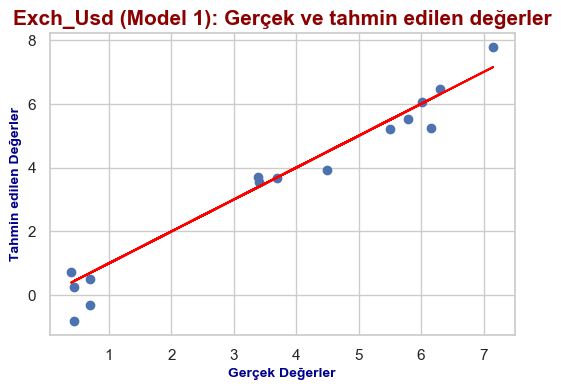

Ortalama Mutlak Hata (MAE)        : 0.4213926086397736
Ortalama Kare Hata (MSE)          : 0.3081151664438764
Kök Ortalama Kare Hata (RMSE)     : 0.5550812250868123
Ortalama Mutlak Yüzde Hata (MAPE) : 43.14432737877231


In [127]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 1): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [129]:
#Model 2
egy_new['inflation']=egy_new['inflation_annual_cpi']*egy_new['inflation_crises']

In [132]:
Y = egy_new['exch_usd']

X = egy_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 'currency_crises', 
       'banking_crisis_new', 'gdp', 'per_capita','inflation']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [134]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           8.58e-19
Time:                        20:56:42   Log-Likelihood:                -11.096
No. Observations:                  35   AIC:                             40.19
Df Residuals:                      26   BIC:                             54.19
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -355.7633     25.770    -13.806      0.000    -408.733    -302.793
year                     0.1814      0.013     13.823      0.000       0.154       0.208
systemic_crisis         -0.6357      0.359     -1.770      0.088      -1.374       0.102
inflation_annual_cpi    -0.0594      0.019     -3.078      0.005      -0.099      -0.020
currency_crises         -0.2639      0.232     -1.139      0.265      -0.740       0.212
banking_crisis_new       0.6413      0.218      2.941      0.007       0.193       1.090
gdp                      0.0844      0.013      6.256      0.000       0.057       0.112
per_capita              -0.0080      0.001     -5.930      0.000      -0.011      -0.005
inflation                0.0115      0.014      0.844      0.406      -0.016       0.039
==============================================================================
Omnibus:                        5.225   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                4.507
Skew:                          -0.418   Prob(JB):                        0.105
Kurtosis:                       4.547   Cond. No.                     8.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

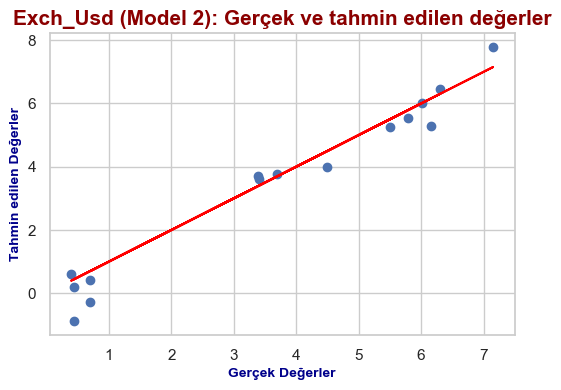

Ortalama Mutlak Hata (MAE)        : 0.4226377217464934
Ortalama Kare Hata (MSE)          : 0.30846121862868986
Kök Ortalama Kare Hata (RMSE)     : 0.5553928507180209
Ortalama Mutlak Yüzde Hata (MAPE) : 43.75994328529995


In [135]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 2): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [136]:
#Model 3
egy_new['crises'] = egy_new.banking_crisis_new*egy_new.systemic_crisis

In [139]:
Y = egy_new['exch_usd']

X = egy_new[[ 'year', 'systemic_crisis','inflation_annual_cpi', 
       'banking_crisis_new', 'gdp', 'per_capita','crises']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [141]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     168.0
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           1.26e-20
Time:                        20:57:28   Log-Likelihood:                -12.326
No. Observations:                  35   AIC:                             38.65
Df Residuals:                      28   BIC:                             49.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -353.1879     25.653    -13.768      0.000    -405.735    -300.640
year                     0.1801      0.013     13.784      0.000       0.153       0.207
systemic_crisis         -0.3083      0.170     -1.808      0.081      -0.658       0.041
inflation_annual_cpi    -0.0521      0.013     -3.917      0.001      -0.079      -0.025
banking_crisis_new       0.5857      0.211      2.773      0.010       0.153       1.018
gdp                      0.0834      0.013      6.225      0.000       0.056       0.111
per_capita              -0.0079      0.001     -5.892      0.000      -0.011      -0.005
crises                  -0.3083      0.170     -1.808      0.081      -0.658       0.041
==============================================================================
Omnibus:                        5.792   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.212
Skew:                          -0.469   Prob(JB):                       0.0738
Kurtosis:                       4.642   Cond. No.                     2.84e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

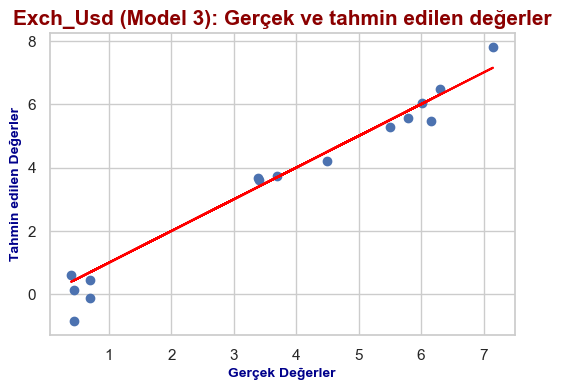

Ortalama Mutlak Hata (MAE)        : 0.37546503437689666
Ortalama Kare Hata (MSE)          : 0.24686893992228098
Kök Ortalama Kare Hata (RMSE)     : 0.49685907450934313
Ortalama Mutlak Yüzde Hata (MAPE) : 41.50269815088586


In [142]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 3): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [144]:
#Model 4
Y = egy_new['exch_usd']

X = egy_new[[ 'year', 'inflation_annual_cpi', 'banking_crisis_new', 'gdp', 'per_capita']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [146]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     186.4
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           4.07e-21
Time:                        20:58:07   Log-Likelihood:                -14.259
No. Observations:                  35   AIC:                             40.52
Df Residuals:                      29   BIC:                             49.85
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -366.9764     25.434    -14.429      0.000    -418.994    -314.958
year                     0.1871      0.013     14.445      0.000       0.161       0.214
inflation_annual_cpi    -0.0479      0.014     -3.522      0.001      -0.076      -0.020
banking_crisis_new       0.3810      0.185      2.058      0.049       0.002       0.760
gdp                      0.0889      0.014      6.572      0.000       0.061       0.117
per_capita              -0.0085      0.001     -6.323      0.000      -0.011      -0.006
==============================================================================
Omnibus:                        5.752   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                4.557
Skew:                          -0.579   Prob(JB):                        0.102
Kurtosis:                       4.336   Cond. No.                     8.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

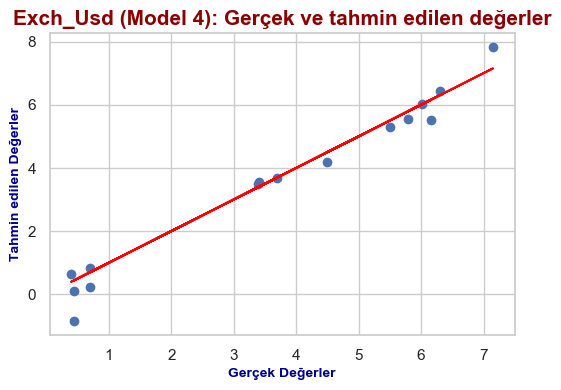

Ortalama Mutlak Hata (MAE)        : 0.3290804840359772
Ortalama Kare Hata (MSE)          : 0.2119348499877694
Kök Ortalama Kare Hata (RMSE)     : 0.46036382350025007
Ortalama Mutlak Yüzde Hata (MAPE) : 37.6654606920591


In [147]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 4): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [148]:
#Model 5
Y = egy_new['exch_usd']

X = egy_new[[ 'year', 'inflation_annual_cpi', 'gdp', 'per_capita']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [150]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           1.88e-21
Time:                        20:58:49   Log-Likelihood:                -16.645
No. Observations:                  35   AIC:                             43.29
Df Residuals:                      30   BIC:                             51.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -379.0829     26.044    -14.555      0.000    -432.273    -325.893
year                     0.1933      0.013     14.570      0.000       0.166       0.220
inflation_annual_cpi    -0.0407      0.014     -2.942      0.006      -0.069      -0.012
gdp                      0.0900      0.014      6.320      0.000       0.061       0.119
per_capita              -0.0087      0.001     -6.189      0.000      -0.012      -0.006
==============================================================================
Omnibus:                        7.801   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.183
Skew:                          -0.711   Prob(JB):                       0.0276
Kurtosis:                       4.704   Cond. No.                     7.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

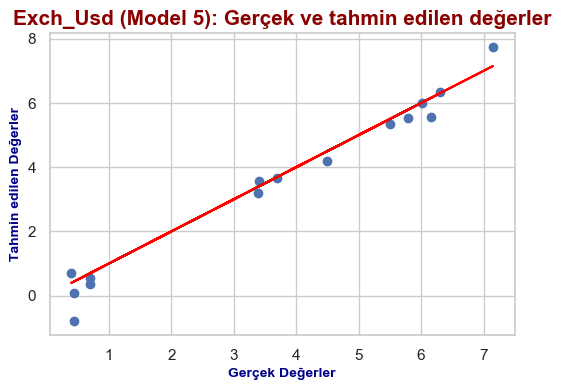

Ortalama Mutlak Hata (MAE)        : 0.3159746914345095
Ortalama Kare Hata (MSE)          : 0.18820822333251688
Kök Ortalama Kare Hata (RMSE)     : 0.43382971697719935
Ortalama Mutlak Yüzde Hata (MAPE) : 37.56804276890292


In [151]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Exch_Usd (Model 5): Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [188]:
img1 = mpimg.imread('model_1.jpg')
img2 = mpimg.imread('model_2.jpg')
img3 = mpimg.imread('model_3.jpg')
img4 = mpimg.imread('model_4.jpg')
img5 = mpimg.imread('model_5.jpg')

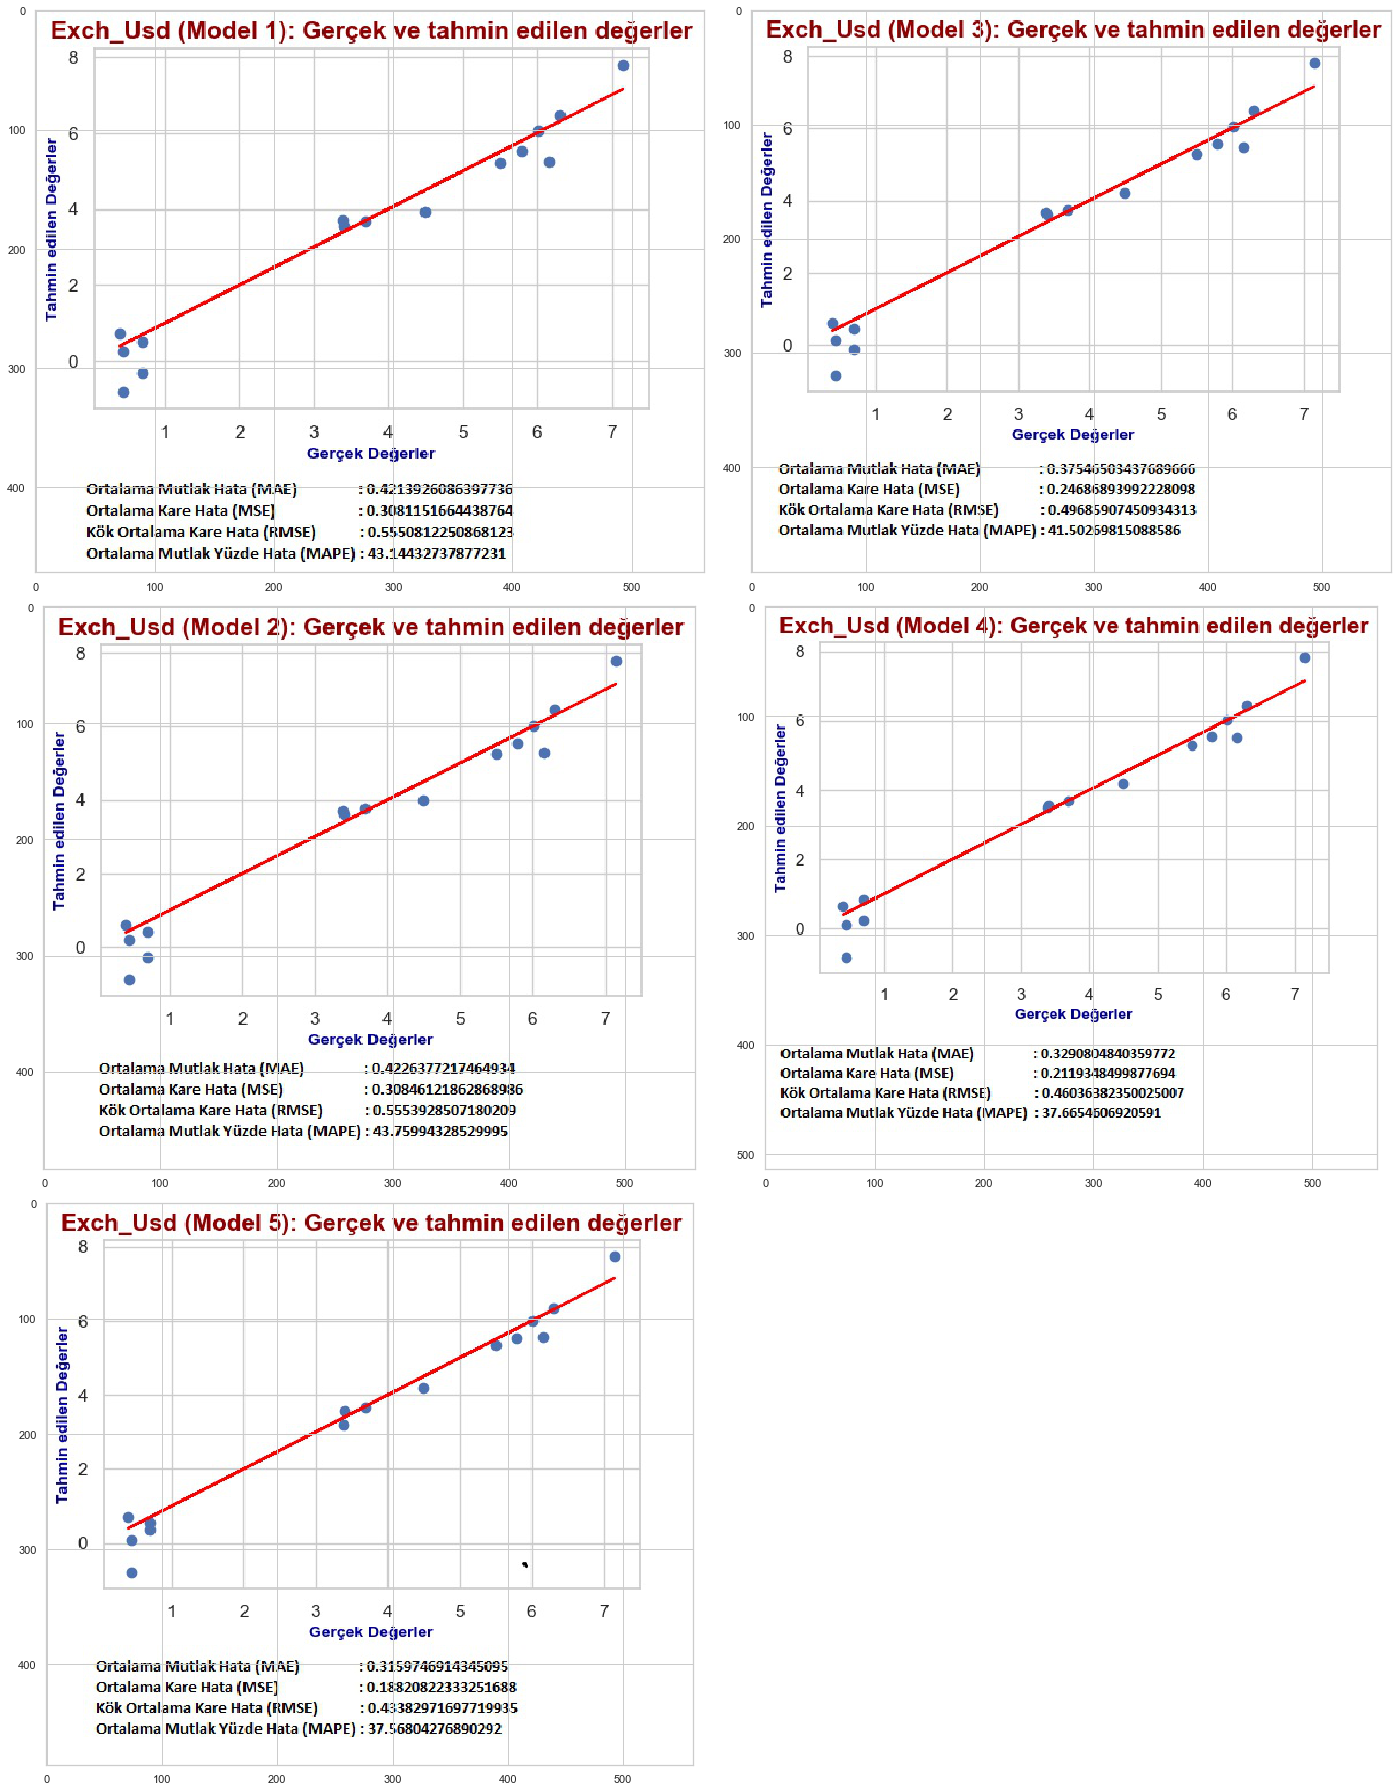

In [315]:
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.imshow(img1)
plt.subplot(3,2,2)
plt.imshow(img3)
plt.subplot(3,2,3)
plt.imshow(img2)
plt.subplot(3,2,4)
plt.imshow(img4)
plt.subplot(3,2,5)
plt.imshow(img5)
plt.tight_layout()
plt.show()

# Conclusion:

When we look at the MAE, MSE, RMSE, R Squared values and the prediction graph of the 5th model among the 5 models we created, more meaningful results are obtained. The variables '' year ',' inflation_annual_cpi ',' gdp ',' per_capita '' are effective on the dollar rate of Egypt.